# Regression Project: Price Prediction of TSLA stock
### By Pattadon Naksuwan

First, we import data from https://finance.yahoo.com/quote/TSLA/history/.

In [1]:
import pandas as pd
data = pd.read_csv('TSLA.csv')

In [2]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-11-10,420.089996,420.089996,396.029999,410.359985,410.359985,30284200
1,2020-11-11,416.450012,418.700012,410.579987,417.130005,417.130005,17357700
2,2020-11-12,415.049988,423.000000,409.519989,411.760010,411.760010,19855100
3,2020-11-13,410.850006,412.529999,401.660004,408.500000,408.500000,19771100
4,2020-11-16,408.929993,412.450012,404.089996,408.089996,408.089996,26838600
...,...,...,...,...,...,...,...
247,2021-11-03,1177.329956,1215.390015,1152.619995,1213.859985,1213.859985,34628500
248,2021-11-04,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,25397400
249,2021-11-05,1228.000000,1239.869995,1208.000000,1222.089966,1222.089966,21579900
250,2021-11-08,1149.790039,1197.000000,1133.000000,1162.939941,1162.939941,33445700


We want to focus on the stock price only in 2021. So, we have to drop all values that are not in 2021.

## Data cleaning

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


There is no null value, so we don't need to deal with the missing values.

In [4]:
(data['Close']==data['Adj Close']).describe() #To see whether close and adj close are the same or not.

count      252
unique       1
top       True
freq       252
dtype: object

In [5]:
data.drop('Adj Close', axis=1, inplace=True)

In [6]:
length = data.shape[0] #This is going to be 252.
change_list=[]
for x in range(length):
    change_list.append(data.iloc[x, 4]-data.iloc[x-1, 4])

change_list

[-613.140015,
 6.770019999999988,
 -5.36999499999996,
 -3.2600100000000225,
 -0.4100040000000149,
 33.51998900000001,
 45.03003000000001,
 12.629974000000004,
 -9.660004000000015,
 32.239990999999975,
 33.53002900000001,
 18.619995000000017,
 11.760009999999966,
 -18.160033999999996,
 17.160033999999996,
 -15.940002999999933,
 24.55999799999995,
 5.659973000000036,
 42.72003199999995,
 8.119995000000017,
 -45.40002500000003,
 22.590027000000077,
 -17.080016999999998,
 29.840026999999964,
 -6.580016999999998,
 -10.479979999999955,
 33.130003999999985,
 39.09997599999997,
 -45.14001499999995,
 -9.519958000000088,
 5.639952999999991,
 15.79004000000009,
 1.9199820000000045,
 2.299987999999985,
 28.79003899999998,
 10.889953999999989,
 24.100037000000043,
 5.3399650000000065,
 20.869994999999903,
 60.059998000000064,
 63.980042000000026,
 -68.830018,
 38.25,
 4.969970999999987,
 -9.409973000000036,
 -18.840026999999964,
 18.39001499999995,
 5.90002400000003,
 -5.460021999999981,
 1.6500249

In [7]:
data['Change']=change_list
data

,Date,Open,High,Low,Close,Volume,Change
0,2020-11-10,420.089996,420.089996,396.029999,410.359985,30284200,-613.140015
1,2020-11-11,416.450012,418.700012,410.579987,417.130005,17357700,6.770020
2,2020-11-12,415.049988,423.000000,409.519989,411.760010,19855100,-5.369995
3,2020-11-13,410.850006,412.529999,401.660004,408.500000,19771100,-3.260010
4,2020-11-16,408.929993,412.450012,404.089996,408.089996,26838600,-0.410004
...,...,...,...,...,...,...,...
247,2021-11-03,1177.329956,1215.390015,1152.619995,1213.859985,34628500,41.859985
248,2021-11-04,1234.410034,1243.489990,1217.000000,1229.910034,25397400,16.050049
249,2021-11-05,1228.000000,1239.869995,1208.000000,1222.089966,21579900,-7.820068
250,2021-11-08,1149.790039,1197.000000,1133.000000,1162.939941,33445700,-59.150025


In [8]:
start_date = "2021-01-04"

after_start_date = data["Date"] >= start_date
data_2021 = data.loc[after_start_date,:].reset_index()

In [9]:
data_2021.drop('index',axis=1,inplace=True)
data_2021

,Date,Open,High,Low,Close,Volume,Change
0,2021-01-04,719.460022,744.489990,717.190002,729.770020,48638200,24.100037
1,2021-01-05,723.659973,740.840027,719.200012,735.109985,32245200,5.339965
2,2021-01-06,758.489990,774.000000,749.099976,755.979980,44700000,20.869995
3,2021-01-07,777.630005,816.989990,775.200012,816.039978,51498900,60.059998
4,2021-01-08,856.000000,884.489990,838.390015,880.020020,75055500,63.980042
...,...,...,...,...,...,...,...
211,2021-11-03,1177.329956,1215.390015,1152.619995,1213.859985,34628500,41.859985
212,2021-11-04,1234.410034,1243.489990,1217.000000,1229.910034,25397400,16.050049
213,2021-11-05,1228.000000,1239.869995,1208.000000,1222.089966,21579900,-7.820068
214,2021-11-08,1149.790039,1197.000000,1133.000000,1162.939941,33445700,-59.150025


## Applying Linear Regression

Let the close stock price be the target variable that we want to predict.

In [10]:
target = 'Close'
y = data_2021[target].to_frame().reset_index().drop('index', axis=1)
x = data_2021.drop('Date', axis=1).drop(target,axis=1).drop('High',axis=1).drop('Low',axis=1).drop('Change',axis=1)

In [11]:
x

,Open,Volume
0,719.460022,48638200
1,723.659973,32245200
2,758.489990,44700000
3,777.630005,51498900
4,856.000000,75055500
...,...,...
211,1177.329956,34628500
212,1234.410034,25397400
213,1228.000000,21579900
214,1149.790039,33445700


In [12]:
y

,Close
0,729.770020
1,735.109985
2,755.979980
3,816.039978
4,880.020020
...,...
211,1213.859985
212,1229.910034
213,1222.089966
214,1162.939941


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
s = StandardScaler()
x_train_s = s.fit_transform(x_train)
lr = LinearRegression()
lr.fit(x_train_s,y_train)

LinearRegression()

In [14]:
from sklearn.metrics import r2_score
x_test_s = s.transform(x_test)
r2_linear = r2_score(y_test,lr.predict(x_test_s))

In [15]:
import numpy as np
from sklearn.metrics import mean_squared_error

def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))

In [16]:
linearRegression_rmse = rmse(y_test,lr.predict(x_test_s))
linearRegression_rmse

22.083795319297973

In [17]:
r2_linear

0.9424029688763622

The R-squared score is 0.942, which is so close to 1. This means that our model works very good, but this maybe due to the change of the close price from the open price is not that much.

## Ridge and Lasso Regression

In [18]:
data_2021.drop('Date', axis=1).drop(target,axis=1).drop('Change',axis=1)

,Open,High,Low,Volume
0,719.460022,744.489990,717.190002,48638200
1,723.659973,740.840027,719.200012,32245200
2,758.489990,774.000000,749.099976,44700000
3,777.630005,816.989990,775.200012,51498900
4,856.000000,884.489990,838.390015,75055500
...,...,...,...,...
211,1177.329956,1215.390015,1152.619995,34628500
212,1234.410034,1243.489990,1217.000000,25397400
213,1228.000000,1239.869995,1208.000000,21579900
214,1149.790039,1197.000000,1133.000000,33445700


In [19]:
new_x = data_2021.drop('Date', axis=1).drop(target,axis=1).drop('Change',axis=1)
new_x = s.fit_transform(new_x)
x_train, x_test, y_train, y_test = train_test_split(new_x, y, test_size=0.3, random_state=0)

In [20]:
from sklearn.linear_model import RidgeCV

alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15]

ridgeCV = RidgeCV(alphas=alphas, 
                  cv=4).fit(x_train,y_train)

ridgeCV_rmse = rmse(y_test, ridgeCV.predict(x_test))

print(ridgeCV.alpha_, ridgeCV_rmse)

0.3 8.380238937157623


In [21]:
ridgeCV.coef_

array([[-50.09854672,  81.65893347,  92.45435257,   1.8682641 ]])

In [22]:
r2_ridge = r2_score(y_test,ridgeCV.predict(x_test))

You can see that using ridge regression makes both rmse and r-square value decreased. Now, let's try lasso regression.

In [23]:
from sklearn.linear_model import LassoCV

alphas2 = np.array([1e-5, 5e-5, 0.0001, 0.0005])

lassoCV = LassoCV(alphas=alphas2,
                  max_iter=5e4,
                  cv=3).fit(x_train, y_train)

lassoCV_rmse = rmse(y_test, lassoCV.predict(x_test))

print(lassoCV.alpha_, lassoCV_rmse)  

1e-05 7.514142161354162


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [24]:
lassoCV.coef_

array([-80.78408796, 106.93997246,  98.04474259,   1.04499258])

In [25]:
r2_lasso = r2_score(y_test, lassoCV.predict(x_test))

Lasso Regression gets the performance close to Ridge Regression, and both of them are better than normal Linear Regression.

In [26]:
rmse_vals = [linearRegression_rmse, ridgeCV_rmse, lassoCV_rmse]

labels = ['Linear', 'Ridge', 'Lasso']

rmse_df = pd.Series(rmse_vals, index=labels).to_frame()
rmse_df.rename(columns={0: 'RMSE'}, inplace=1)
rmse_df

,RMSE
Linear,22.083795
Ridge,8.380239
Lasso,7.514142


In [27]:
r2_vals = [r2_linear, r2_ridge, r2_lasso]
rmse_df['R-Squared'] = pd.Series(r2_vals, index=labels).to_frame()
rmse_df

,RMSE,R-Squared
Linear,22.083795,0.942403
Ridge,8.380239,0.991706
Lasso,7.514142,0.993332


We can try to predict the stock price using number of day to make it more challenging. We will start by changing from date to number 1,2,3,... .

In [28]:
data_2021 = data_2021.reset_index()
data_2021

,index,Date,Open,High,Low,Close,Volume,Change
0,0,2021-01-04,719.460022,744.489990,717.190002,729.770020,48638200,24.100037
1,1,2021-01-05,723.659973,740.840027,719.200012,735.109985,32245200,5.339965
2,2,2021-01-06,758.489990,774.000000,749.099976,755.979980,44700000,20.869995
3,3,2021-01-07,777.630005,816.989990,775.200012,816.039978,51498900,60.059998
4,4,2021-01-08,856.000000,884.489990,838.390015,880.020020,75055500,63.980042
...,...,...,...,...,...,...,...,...
211,211,2021-11-03,1177.329956,1215.390015,1152.619995,1213.859985,34628500,41.859985
212,212,2021-11-04,1234.410034,1243.489990,1217.000000,1229.910034,25397400,16.050049
213,213,2021-11-05,1228.000000,1239.869995,1208.000000,1222.089966,21579900,-7.820068
214,214,2021-11-08,1149.790039,1197.000000,1133.000000,1162.939941,33445700,-59.150025


In [29]:
data_2021['number'] = data_2021['index']+1

In [30]:
data_2021

,index,Date,Open,High,Low,Close,Volume,Change,number
0,0,2021-01-04,719.460022,744.489990,717.190002,729.770020,48638200,24.100037,1
1,1,2021-01-05,723.659973,740.840027,719.200012,735.109985,32245200,5.339965,2
2,2,2021-01-06,758.489990,774.000000,749.099976,755.979980,44700000,20.869995,3
3,3,2021-01-07,777.630005,816.989990,775.200012,816.039978,51498900,60.059998,4
4,4,2021-01-08,856.000000,884.489990,838.390015,880.020020,75055500,63.980042,5
...,...,...,...,...,...,...,...,...,...
211,211,2021-11-03,1177.329956,1215.390015,1152.619995,1213.859985,34628500,41.859985,212
212,212,2021-11-04,1234.410034,1243.489990,1217.000000,1229.910034,25397400,16.050049,213
213,213,2021-11-05,1228.000000,1239.869995,1208.000000,1222.089966,21579900,-7.820068,214
214,214,2021-11-08,1149.790039,1197.000000,1133.000000,1162.939941,33445700,-59.150025,215


In [31]:
data_2021.drop('index', axis=1, inplace=True)
data_2021

,Date,Open,High,Low,Close,Volume,Change,number
0,2021-01-04,719.460022,744.489990,717.190002,729.770020,48638200,24.100037,1
1,2021-01-05,723.659973,740.840027,719.200012,735.109985,32245200,5.339965,2
2,2021-01-06,758.489990,774.000000,749.099976,755.979980,44700000,20.869995,3
3,2021-01-07,777.630005,816.989990,775.200012,816.039978,51498900,60.059998,4
4,2021-01-08,856.000000,884.489990,838.390015,880.020020,75055500,63.980042,5
...,...,...,...,...,...,...,...,...
211,2021-11-03,1177.329956,1215.390015,1152.619995,1213.859985,34628500,41.859985,212
212,2021-11-04,1234.410034,1243.489990,1217.000000,1229.910034,25397400,16.050049,213
213,2021-11-05,1228.000000,1239.869995,1208.000000,1222.089966,21579900,-7.820068,214
214,2021-11-08,1149.790039,1197.000000,1133.000000,1162.939941,33445700,-59.150025,215


And now, we have it!!

In [32]:
data_2021_filtered = data_2021.drop('Date',axis=1).drop('Open',axis=1).drop('High',axis=1).drop('Low',axis=1).drop('Change',axis=1).drop('Volume',axis=1)

In [33]:
data_2021_filtered

,Close,number
0,729.770020,1
1,735.109985,2
2,755.979980,3
3,816.039978,4
4,880.020020,5
...,...,...
211,1213.859985,212
212,1229.910034,213
213,1222.089966,214
214,1162.939941,215


In [34]:
y = data_2021_filtered[['Close']]
x = data_2021_filtered.drop('Close',axis=1)

In [35]:
y

,Close
0,729.770020
1,735.109985
2,755.979980
3,816.039978
4,880.020020
...,...
211,1213.859985
212,1229.910034
213,1222.089966
214,1162.939941


In [36]:
x

,number
0,1
1,2
2,3
3,4
4,5
...,...
211,212
212,213
213,214
214,215


In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
x_train_s = s.fit_transform(x_train)
lr = LinearRegression()
lr.fit(x_train_s,y_train)

LinearRegression()

In [38]:
x_test_s = s.transform(x_test)
r2_score(y_test,lr.predict(x_test_s))

-0.3213074675655989

In [39]:
lr.predict(x_test_s)

array([[809.1852046 ],
       [685.76594721],
       [725.38200513],
       [786.32978656],
       [773.37838301],
       [714.71614338],
       [730.71493601],
       [762.71252126],
       [661.38683464],
       [720.81092153],
       [699.47919803],
       [768.8072994 ],
       [780.23500842],
       [747.4755759 ],
       [713.95429612],
       [812.99444094],
       [760.42697945],
       [666.71976551],
       [774.90207754],
       [734.52417235],
       [800.80488465],
       [767.28360487],
       [806.89966279],
       [803.09042645],
       [755.85589585],
       [671.29084912],
       [791.66271744],
       [669.00530731],
       [723.09646333],
       [711.66875431],
       [662.91052917],
       [705.57397617],
       [787.8534811 ],
       [731.47678328],
       [761.95067399],
       [778.71131388],
       [682.71855814],
       [764.99806306],
       [726.1438524 ],
       [809.94705186],
       [739.09525596],
       [796.23380104],
       [750.52296497],
       [669

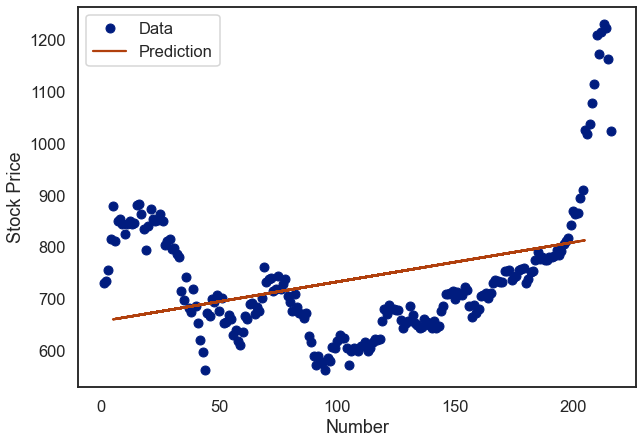

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('white')
sns.set_context('talk')
sns.set_palette('dark')

plt.figure(figsize=(10,7))
plt.plot(data_2021_filtered['number'], data_2021_filtered['Close'],marker='o', ls='',label='Data', alpha=1)
plt.plot(x_test, lr.predict(x_test_s), marker='',alpha=1, label='Prediction')
plt.legend()
plt.plot()
ax = plt.gca()
ax.set(xlabel='Number', ylabel='Stock Price');

You can clearly see that the model perfroms really bad. So, we need to try new ones.

In [41]:
x_test = x_test.sort_values(by=['number'])

In [42]:
from sklearn.preprocessing import PolynomialFeatures
degree = 20
pf = PolynomialFeatures(degree)
x_poly = pf.fit_transform(x_train)
lr = lr.fit(x_poly, y_train)
x_test_poly = pf.transform(x_test)
y_predict = lr.predict(x_test_poly)

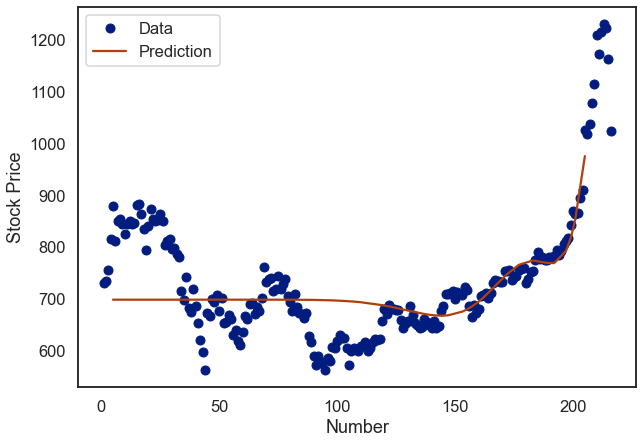

In [43]:
plt.figure(figsize=(10,7))
plt.plot(data_2021_filtered['number'], data_2021_filtered['Close'],marker='o', ls='',label='Data', alpha=1)
plt.plot(x_test, lr.predict(x_test_poly), marker='',alpha=1, label='Prediction')
plt.legend()
plt.plot()
ax = plt.gca()
ax.set(xlabel='Number', ylabel='Stock Price');

In [44]:
r2_score(y_test, y_predict)

-0.23986853280746812

In [45]:
y_predict

array([[698.58865543],
       [698.58865543],
       [698.58865543],
       [698.58865543],
       [698.58865543],
       [698.58865543],
       [698.58865543],
       [698.58865543],
       [698.58865543],
       [698.58865543],
       [698.58865541],
       [698.58865491],
       [698.58865267],
       [698.58864683],
       [698.58862124],
       [698.58860817],
       [698.58828233],
       [698.58783177],
       [698.58516478],
       [698.58321096],
       [698.57837372],
       [698.5611507 ],
       [698.54103003],
       [698.53183236],
       [698.52106802],
       [698.45733622],
       [698.37884881],
       [698.26135773],
       [698.08953883],
       [698.01694927],
       [697.35908204],
       [697.20268405],
       [696.39934532],
       [694.89236789],
       [694.50974867],
       [693.65225987],
       [688.07228149],
       [684.65726026],
       [683.72460603],
       [677.70911824],
       [671.86651338],
       [671.03175739],
       [670.26446362],
       [669

In [46]:
y_test

,Close
199,870.109985
37,675.500000
89,589.890015
169,733.570007
152,707.820007
...,...
106,605.130005
8,845.000000
40,653.200012
170,752.919983
